# CS 109A/AC 209A/STAT 121A Data Science: Lab 6 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Step 1: Read in the data and visualize

In [4]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543, 64)
response array shape: (543,)


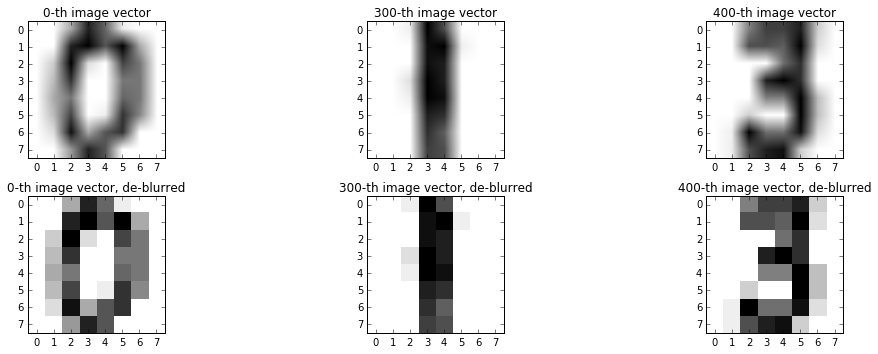

In [5]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')
ax[0, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')
ax[0, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')

plt.tight_layout()
plt.show()

### Step 2:  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data. That is, we want to **project** the data onto a smaller space (think line or plane).

**Question:** How many dimensions to which should we reduce the data?

**Question:** Which subspace should we project the data onto?

Let's just experiment a bit: trial and error.

We'll try to project the data down to 2 dimensions and three dimensions. We'll randomnly select some predictors and project the data down to the plane or cube defined by these predictors.

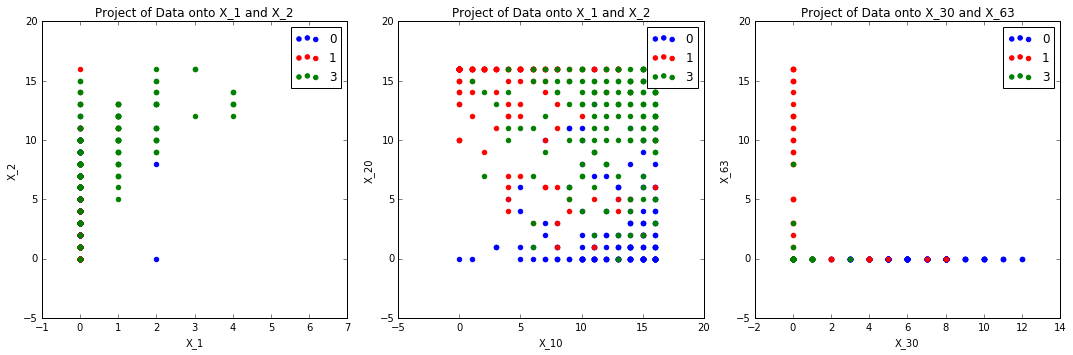

In [6]:
#Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

#Project onto axes: 10, 20
x_2d = x[:, [10, 20]]

ax[1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')
 
ax[1].set_xlabel('X_10')
ax[1].set_ylabel('X_20')
ax[1].set_title('Project of Data onto X_1 and X_2')
ax[1].legend()


#Project onto axes: 30, 63
x_2d = x[:, [30, -1]]

ax[2].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[2].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[2].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[2].set_xlabel('X_30')
ax[2].set_ylabel('X_63')
ax[2].set_title('Project of Data onto X_30 and X_63')
ax[2].legend()

plt.tight_layout()
plt.show()

All these projections are really bad! In the sense that they don't seem capture the variation in the data **and** the classes are not separated when we project (no separation means no good decision surface, which means poor classification)!

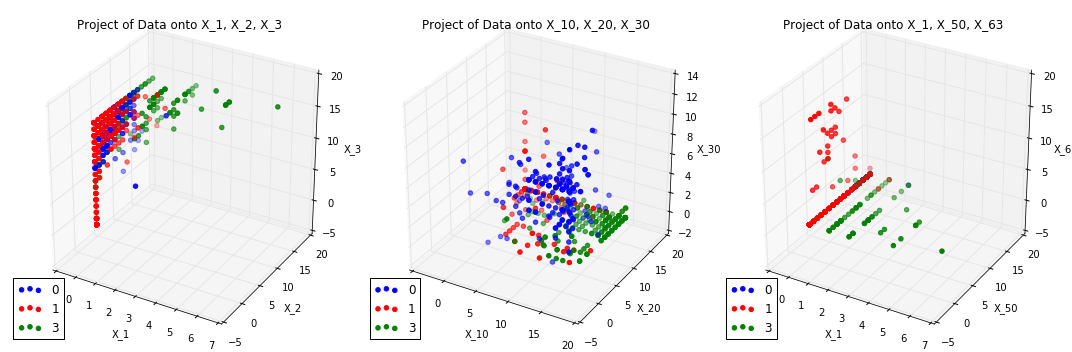

In [7]:
#Let's project the data onto some random 2D planes
fig = plt.figure(figsize=(15, 5))


#Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

#Project onto axes: 10, 20, 30
x_2d = x[:, [10, 20, 30]]

ax2 = fig.add_subplot(1, 3, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax2.set_xlabel('X_10')
ax2.set_ylabel('X_20')
ax2.set_zlabel('X_30')
ax2.set_title('Project of Data onto X_10, X_20, X_30')
ax2.legend(loc='lower left')

#Project onto axes: 1, 50, 63
x_2d = x[:, [1, 50, 63]]

ax3 = fig.add_subplot(1, 3, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax3.set_xlabel('X_1')
ax3.set_ylabel('X_50')
ax3.set_zlabel('X_63')
ax3.set_title('Project of Data onto X_1, X_50, X_63')
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()

All these projections are really bad! In the sense that they don't seem capture the variation in the data **and** the classes are not well separated when we project (no separation means no good decision surface, which means poor classification)!

Let's try PCA. Recall that PCA finds the directions of maximum variation in the data! So let us see if projecting onto the axes of maximum variation yields more separability!

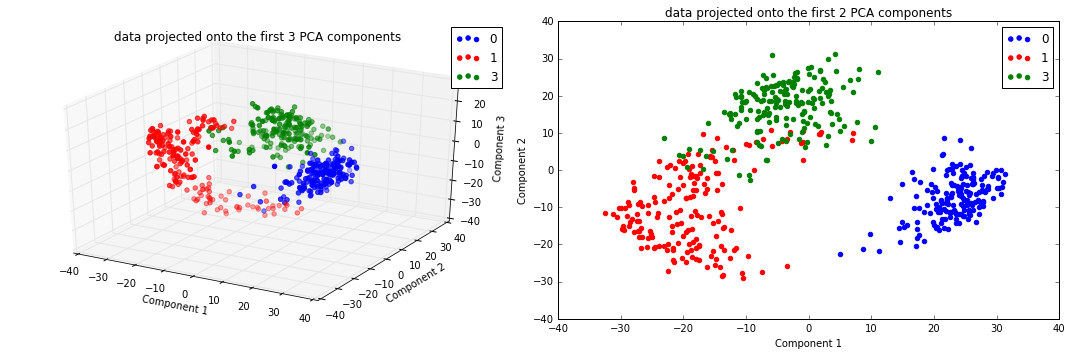

In [8]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

By contruction, the first 2 or 3 components of PCA captures the top 2 or 3 directions of maximum variation. Luckily in our case, the top 2 and 3 components also captures the **separation** in the classes! In fact, we realize that using 2 components of the PCA already separates all three classes! That means we can get away with using just two (linear combinations of) predictors!

**Question:** Does the directions of maximum variation always correspond to maximum separation of the classes? That is, is projecting our data onto the top components of the PCA always a good idea for classification?

**Question:** Recall that the components of PCA are **linear combos of our original predictors**. E.g. component 1 might be 
$$X_1 - 2 X_{10} + 10 X_{63}.$$
But in our case, our predictors are pixels, thus, each PCA component is a combination of different pixels - that is, each PCA component is a digital image! This is good news! It means that the components of the PCA are potentially interpretable.

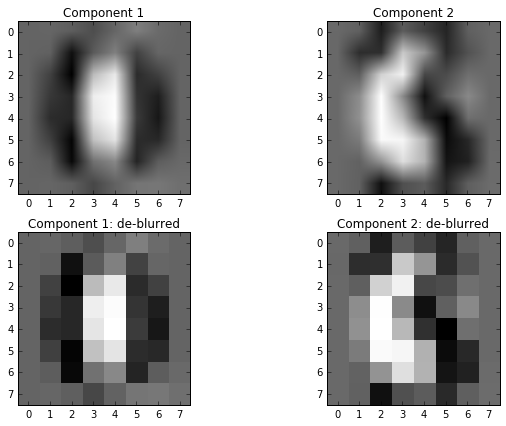

In [73]:
#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

The first component looks like the digit 0 and the second resembles the digit 3! 

Look at our data projected onto the first two components: 

1. nearly all the data points corresponding to 0 are expressed as **a combination of a positive multiple of component 1 and a negative multiple of component 2**;

2. nearly all the data points corresponding to 3 are expressed as **a combination of a negative multiple of component 1 and a positive multiple of component 2**;

3. Nearly all the data points corresponding to the digit 1 is expressed as **a negative combination of the two components**.

**Sanity check:** does this intuitively make sense? 

### Step 3: Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [13]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


Is this accuracy meaningful? We've already seen cases where high R^2 values can be deeply misleading. Is an high accuracy rate mean we've learned a good classifier? Shouldn't there be a more intuitive way to assess the quality of our classifiers?

There many ways to verify the meaningfulness of our metrics (like R^2 and accuracy rate), in this case, since the reduced data is low dimensional, we can visually check the "goodness" of our classifier. I.e. we can plot our data and visualize the decision boundaries (the lines on which logistic regression rely to separate one class from another).

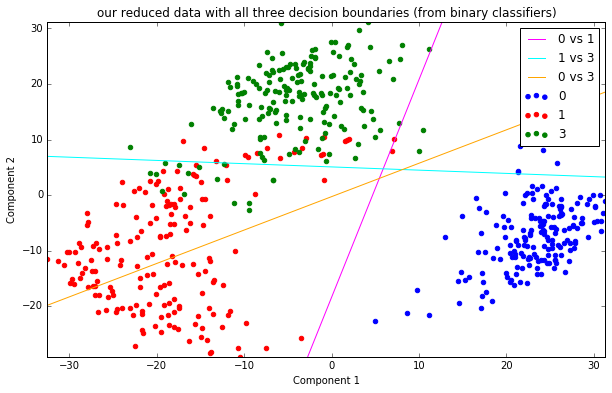

In [81]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='b', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='r', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()